<a href="https://colab.research.google.com/github/mo72001/T5/blob/main/Copy_of_ANN_Model_Exercise_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an ANN with the Iris Dataset
    
    ## Introduction
    Artificial Neural Networks (ANNs) are a cornerstone of modern machine learning. In this lab, you will construct a simple ANN to classify iris plants into one of three species based on the length and width of their sepals and petals. This exercise will help you understand the basics of neural networks, including their architecture, activation functions, and the backpropagation algorithm for training.

    ## Dataset Reference
    The Iris dataset was introduced by the British statistician and biologist Ronald Fisher in 1936. It is widely used as a beginner's dataset for machine learning classification problems. You can access this dataset via the `sklearn.datasets` module.
    

## Part 1: Load and Explore the Data
    ### Load the Dataset
    **Hint**: Use `sklearn.datasets.load_iris()` to load the Iris dataset into your environment.

    ### Explore the Data
    **Hint**: Use `pandas` to examine the first few rows of the dataset and `matplotlib` or `seaborn` to visualize the feature distributions.
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [2]:
df = load_iris()

## Part 2: Prepare the Data
    ### Split the Data into Training and Test Sets
    **Hint**: Use `train_test_split` from `sklearn.model_selection` to divide the data into training and test sets.

    ### Scale the Features
    **Hint**: Standardize the features using `StandardScaler` from `sklearn.preprocessing`.
    

In [3]:
X = df.data
y = df.target

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_val,X_val,y_train_val,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_val = scaler.fit_transform(X_train_val)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

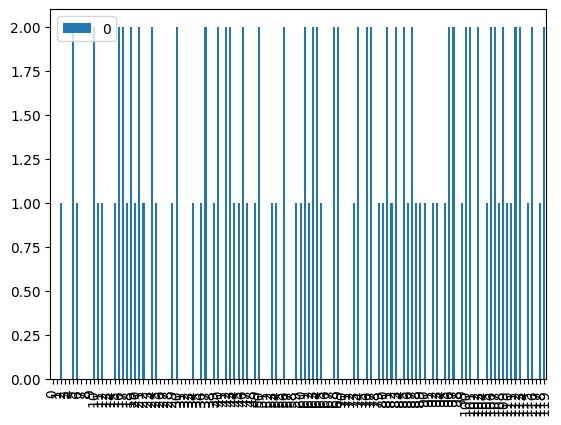

In [8]:
pd.DataFrame(y_train).plot(kind = 'bar')

## Part 3: Build the ANN Model
    ### Define the Model
    **Hint**: Use `keras` to define a sequential model. Start with a single hidden layer with a ReLU activation function.

    ### Compile the Model
    **Hint**: Compile your model specifying an optimizer and loss function appropriate for classification.
    

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
                    Dense(units = 20,activation = 'relu'),
                    Dense(units = 3,activation = 'softmax')])


model.compile(optimizer = 'adam', metrics=['acc'], loss = 'sparse_categorical_crossentropy')


## Part 4: Train the Model
    ### Train the Model
    **Hint**: Fit the model on your training data with a reasonable number of epochs.

    ### Evaluate the Model
    **Hint**: Use the test data to evaluate your model and report the accuracy.
    

In [11]:
model.fit(X_train_val,y_train_val,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - acc: 0.4453 - loss: 1.0302 - val_acc: 0.4167 - val_loss: 1.0547
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.4375 - loss: 1.0227 - val_acc: 0.4167 - val_loss: 1.0297
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.4674 - loss: 0.9928 - val_acc: 0.4167 - val_loss: 1.0062
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.4557 - loss: 0.9719 - val_acc: 0.4583 - val_loss: 0.9830
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.5013 - loss: 0.9388 - val_acc: 0.4583 - val_loss: 0.9609
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.5456 - loss: 0.8959 - val_acc: 0.5000 - val_loss: 0.9401
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - acc: 0.5573 - loss: 0.8914 - val_acc: 0.5833 - val_loss: 0.9199
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - acc: 0.5807 - loss: 0.8606 - val_acc: 0.5833 - val_loss: 0.9005
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.6068 - loss: 0.8526 -

## Part 5: Experiment and Improve
    ### Tune the Model
    **Hint**: Try adding more hidden layers or neurons, or use different activation functions and see if the accuracy improves.

    ### Regularization and Dropout
    **Hint**: Implement dropout or regularization techniques to improve the model's generalization.
    

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
model = Sequential([
                    Dense(units = 20,activation = 'relu'),
                    Dense(units = 15,activation = 'relu'),
                    Dense(units = 3,activation = 'softmax')])

adm_opt = tf.keras.optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer = adm_opt, metrics=['acc'], loss = 'sparse_categorical_crossentropy')


In [13]:
model.fit(X_train_val,y_train_val,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - acc: 0.3906 - loss: 1.2277 - val_acc: 0.7500 - val_loss: 0.7992
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.5911 - loss: 0.8163 - val_acc: 0.7917 - val_loss: 0.6281
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.6523 - loss: 0.6329 - val_acc: 0.7500 - val_loss: 0.5478
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.6341 - loss: 0.5945 - val_acc: 0.7917 - val_loss: 0.4996
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.7734 - loss: 0.5228 - val_acc: 0.8333 - val_loss: 0.4695
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - acc: 0.7995 - loss: 0.4600 - val_acc: 0.7917 - val_loss: 0.4577
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - acc: 0.8034 - loss: 0.4214 - val_acc: 0.7500 - val_loss: 0.4603
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.7956 - loss: 0.3863 - val_acc: 0.7500 - val_loss: 0.4487
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - acc: 0.8177 - loss: 0.3626 -

In [15]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (32, 20)                    │             100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 15)                    │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 3)                     │              48 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,391 (5.44 KB)

 Trainable params: 463 (1.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 928 (3.63 KB)


## Part 4: Model Evaluation
### Evaluate the Model
To effectively evaluate your artificial neural network, consider the following metrics:
- **Accuracy**: This is the fraction of predictions our model got right.
- **Confusion Matrix**: A table used to describe the performance of a classification model on a set of test data for which the true values are known.
- **Precision, Recall, and F1-Score**: These metrics provide more insight into the types of errors made by the classifier.
**Hint**: Use `classification_report` and `confusion_matrix` from `sklearn.metrics` to calculate these metrics.

### Visualize Model Performance
Visualizing the learning curves (loss and accuracy over epochs) can provide insights into the training process, such as whether the model is fitting or overfitting.
**Hint**: Use `matplotlib.pyplot` to plot training and validation loss and accuracy.


In [16]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred1 = model.predict(X_val)
y_pred = np.argmax(y_pred1,axis=1)
print(classification_report(y_val,y_pred))
print(confusion_matrix(y_val,y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.71      1.00      0.83         5

    accuracy                           0.92        24
   macro avg       0.90      0.94      0.91        24
weighted avg       0.94      0.92      0.92        24

[[8 0 0]
 [0 9 2]
 [0 0 5]]


## Conclusion
    Summarize what the learner should have gained from this lab, including a better understanding of how ANNs work and how they can be applied to real-world classification problems.
    